## PCA(Principal Component Analysis)

### 1. 차원축소

&nbsp;&nbsp;&nbsp; 특정 데이터에 너무 많은 특징(feature)가 있고, 이를 모두 활용해서 머신러닝을 진행할 경우 머신러닝의 성능과 결과에 대한 신뢰도는 떨어질 수밖에 없습니다. 피처가 늘어날 수록 데이터의 차원이 늘어나며 데이터 포인트 간 거리가 기하급수적으로 늘어날 뿐만 아니라, 각 피처 간의 높은 상관 관계로 다중공선성 문제가 나타날 수도 있기 때문이죠. 그렇기 때문에 많은 경우 피쳐가 많은 데이터는 차원을 축소해서 전체 데이터를 더 잘 설명하는 주요 요소를 추출하는 과정이 필요합니다. 이는 크게 두 가지 방식으로 나눌 수 있습니다.

&nbsp;&nbsp;&nbsp; **참고)다중공선성의 문제점**<br>
&nbsp;&nbsp;&nbsp; -피처들 간 상관관계로 회귀 계수가 불안정해질 수 있습니다.<br>
&nbsp;&nbsp;&nbsp; -각 피처의 개별적인 영향력을 해석하기 어려워집니다.<br>
&nbsp;&nbsp;&nbsp; -회기 계수의 절대값을 매우 크게 만들어 모델의 해석을 왜곡할 수 있습니다.<br>
&nbsp;&nbsp;&nbsp; -모델의 과적합 가능성이 높아집니다.<br>
&nbsp;&nbsp;&nbsp; **1)피처 선택 :** 다른 피처에 종속성이 강한 불필요한 피처를 제거하면서 전체 데이터의 특성을 잘 나태내는 주요 피처만 선택하는 방법입니다.<br>
&nbsp;&nbsp;&nbsp; **2)피처 추출 :** 여러 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 새로운 피처를 추출하는 방법입니다. 기존의 차원이 아닌 다른 차원으로 매핑하는 이유는 정보 손실이 크기 때문인데요. 가령 학생을 평가하는 다양한 요소로 모의고사 성적, 내신 성적, 수능 성적이 있다면 이 모두를 묶어 학업 성취도라는 새로운 요약 특성으로 추출하는 것을 피처 추출의 예시로 들 수 있는데, 기존의 차원으로 한다면 나머지 지표를 모두 모의고사 성적으로만 통합해내는 식이 되어버릴 것이기 때문입니다. 


### 2. PCA 개요

&nbsp;&nbsp;&nbsp; PCA는 대표적인 차원 축소 방식으로, 피처들 간의 상관관계를 이용해 주성분을 추출해내는 방법입니다. 기존 모든 변수들의 선형 결합으로 주성분을 만들어 내며, 이를 간단하게 도식화하면 다음과 같습니다.

$$
c = a*x_{1} + b*x_{2}
$$

&nbsp;&nbsp;&nbsp; PCA는 기존 데이터 차원(feature) 값을 결합해 새로운 피처를 추출하기에 피처 추출에 속합니다. 이를 통해 더 적은 차원으로 데이터를 효과적으로 설명해내는 것이 기본적인 목적입니다.


### 3. PCA 절차

&nbsp;&nbsp;&nbsp; 1)데이터의 분산을 최대한 보존하면서 직교하는 새로운 축(기저)을 찾아냅니다.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -분산이 커야하는 이유 : 원본의 특징을 최대한 반영하게 될 수 있을 분만 아니라 데이터들 사이의 차이가 명확해져 좋은 모델을 만들 수 있습니다.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -공분산 행렬의 고유값 분해를 통해 새로운 축을 알아낼 수 있습니다.<br>
&nbsp;&nbsp;&nbsp; 2)첫번째 축과 직교(독립)하면서 분산이 최대인 두번째 축을 찾습니다.<br>
&nbsp;&nbsp;&nbsp; 3)위의 과정을 기존 차원의 수만큼 반복합니다. 이를 통해 기존 차원 수만큼 주성분을 찾아냅니다.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -주의 : 첫번째 축과 세번째 축은 서로 차원이 다름!<br>
&nbsp;&nbsp;&nbsp; 4)원 데이터의 분산을 얼마나 반영하는지 확인하면서 적정 수의 주성분을 선택합니다.<br>
&nbsp;&nbsp;&nbsp; 5)새로운 차원에 대해 데이터를 사영(좌표반환) 해줍니다. 앞의 도식을 생각하면 됩니다.

$$
c = a*x_{1} + b*x_{2}
$$


### 4. 공분산

&nbsp;&nbsp;&nbsp; *"공분산 행렬의 고유값 분해를 통해 새로운 축을 알아낼 수 있다"*

&nbsp;&nbsp;&nbsp; **1)공분산** :

&nbsp;&nbsp;&nbsp; -두 변수간 관계를 나타내는 척도로, X와 Y가 얼마나 함께 변하는지를 측정합니다. 공분산이 양수이면 같은 방향으로, 음수이면 반대 반얗ㅇ으로 변하는 경향이 있으며, 0에 가까우면 선형적 관계가 거의 없음을 나타냅니다.

&nbsp;&nbsp;&nbsp; -공분산 수식 :

$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$

&nbsp;&nbsp;&nbsp; -$n$은 데이터의 개수입니다.

&nbsp;&nbsp;&nbsp; -$X_i$와 $Y_i$는 각각 $X$와 $Y$의 $i$번째 데이터 값입니다.

&nbsp;&nbsp;&nbsp; -$\bar{X}$와 $\bar{Y}$는 각각 $X$와 $Y$의 평균 값입니다.

&nbsp;&nbsp;&nbsp; **2)공분산 행렬**

&nbsp;&nbsp;&nbsp; 공분산 행렬은 다변량 데이터의 각 변수들 간의 공분산을 나타내는 행렬입니다. 예를 들어, $n$개의 관측값을 가지는 $d$차원 데이터셋 $X$가 있을 때, 공분산 행렬 $\Sigma$는 다음과 같이 정의됩니다.

$$
\Sigma = \frac{1}{n-1} X^T X
$$

&nbsp;&nbsp;&nbsp; 여기서 $X$는 데이터 행렬입니다. 공분산 행렬의 각 요소 $\Sigma_{ij}$는 변수 $i$와 변수 $j$ 간의 공분산을 나타냅니다.

&nbsp;&nbsp;&nbsp; **3)고유값 분해**

&nbsp;&nbsp;&nbsp; 고유값 분해(Eigenvalue Decomposition)는 정방 행렬 $A$를 고유값과 고유벡터를 이용하여 다음과 같이 분해하는 방법입니다.

$$
A = V \Lambda V^{-1}
$$

여기서:

&nbsp;&nbsp;&nbsp;- $V$는 고유벡터를 열 벡터로 가지는 행렬입니다.

&nbsp;&nbsp;&nbsp; - $\Lambda$는 대각선 요소로 고유값을 가지는 대각행렬입니다.

&nbsp;&nbsp;&nbsp;- $V^{-1}$는 $V$의 역행렬입니다.

&nbsp;&nbsp;&nbsp; **4)공분산 행렬의 고유값 분해**

&nbsp;&nbsp;&nbsp; 공분산 행렬 $\Sigma$에 고유값 분해를 적용하면 다음과 같이 표현할 수 있습니다.

$$
\Sigma = V \Lambda V^T
$$

여기서:

&nbsp;&nbsp;&nbsp; -$V$는 공분산 행렬 $\Sigma$의 고유벡터를 열 벡터로 가지는 행렬입니다.

&nbsp;&nbsp;&nbsp; -$\Lambda$는 공분산 행렬 $\Sigma$의 고유값을 대각선 요소로 가지는 대각행렬입니다.

&nbsp;&nbsp;&nbsp; -$V^T$는 $V$의 전치행렬입니다.

&nbsp;&nbsp;&nbsp; **5)PCA와의 관계**

&nbsp;&nbsp;&nbsp; PCA는 공분산 행렬의 고유값 분해를 이용하여 데이터를 새로운 축(주성분)으로 변환하는 과정입니다. 다음 단계로 이루어집니다:

&nbsp;&nbsp;&nbsp; - **공분산 행렬 계산:** 데이터 행렬 $X$의 공분산 행렬 $\Sigma$를 계산합니다.

&nbsp;&nbsp;&nbsp; - **고유값 분해:** 공분산 행렬 $\Sigma$의 고유값과 고유벡터를 구합니다.

&nbsp;&nbsp;&nbsp; - **주성분 선택:** 가장 큰 고유값에 대응하는 고유벡터들이 가장 중요한 주성분이 됩니다. 이 고유벡터들이 새로운 축을 형성합니다.

&nbsp;&nbsp;&nbsp; - **데이터 변환:** 원본 데이터를 이 새로운 축으로 변환합니다. 이를 통해 데이터의 분산을 최대한 보존하면서 차원을 축소할 수 있습니다.



### 4. 장단점

&nbsp;&nbsp;&nbsp; **1)장점**

&nbsp;&nbsp;&nbsp; -고차원 데이터를 더 쉽게 이해할 수 있게 해줍니다.

&nbsp;&nbsp;&nbsp; -차원의 저주 및 다중공선성 문제를 해소하고 머신러닝의 성능을 높일 수 있습니다.

&nbsp;&nbsp;&nbsp; -기존 데이터 차원에서의 변수 중요도를 확인 가능 : 주성분으로 선형변환하는 식에서 계수값이 클수록 영향력이 큽니다

&nbsp;&nbsp;&nbsp; **2)단점 :**

&nbsp;&nbsp;&nbsp; -각 주성분의 의미를 해석하기 어렵습니다.

&nbsp;&nbsp;&nbsp; -원데이터에 대해 필연적으로 정보 손실이 발생할 수밖에 없습니다.

### 4. 참고 자료

&nbsp;&nbsp;&nbsp; https://roytravel.tistory.com/64

&nbsp;&nbsp;&nbsp; https://velog.io/@swan9405/PCA

### 5. 코드 분석 및 실습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(df)

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [2]:
#스탠다드 스케일링
from sklearn.preprocessing import StandardScaler

x = df.drop(['target'], axis = 1).values
y = df['target'].values
x = StandardScaler().fit_transform(x)
features = ['sepal length', 'sepal width', 'petal lenth', 'petal width']
pd.DataFrame(x, columns = features)


,sepal length,sepal width,petal lenth,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [12]:
#분산량 측정 : 1, 2번만 유의미 => 주성분 두개로

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns = ['principal component1', 'principal component2', '3','4'])
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


In [14]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns = ['principal_component1', 'principal_component2'])
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]


In [18]:
#새로운 공간에 투영하고 나면 원래의 변수들이 사라짐.
#PC1, PC2이라는 축이 존재할 뿐, 더 이상 'sepal length'이나 'sepal width' 같은 이름을 붙일 수가 없다.
principalDf

,principal component1,principal component2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


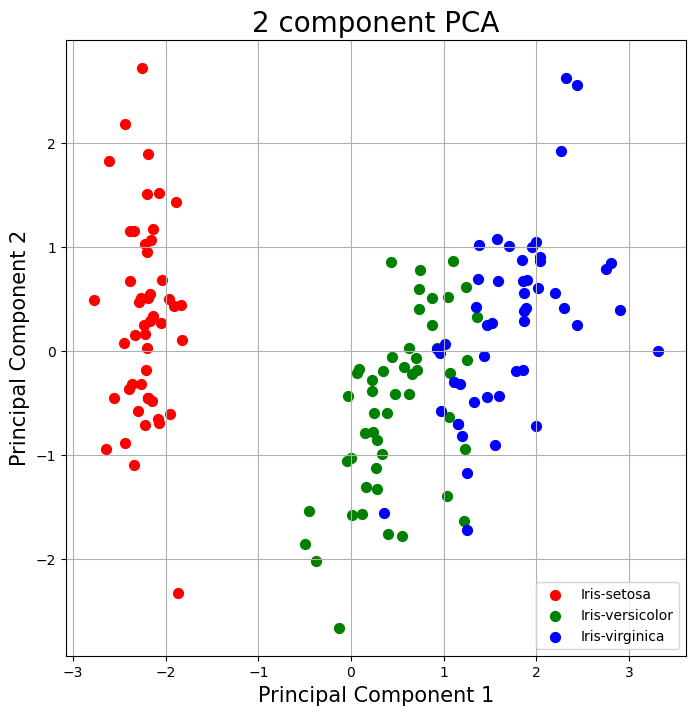

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

컴포넌트의 설명률 (PC1, PC2, ... 순서대로 계속 작아지는 게 정상)

[0.72770452 0.23030523 0.03683832 0.00515193]


Text(0, 0.5, 'Explained %')

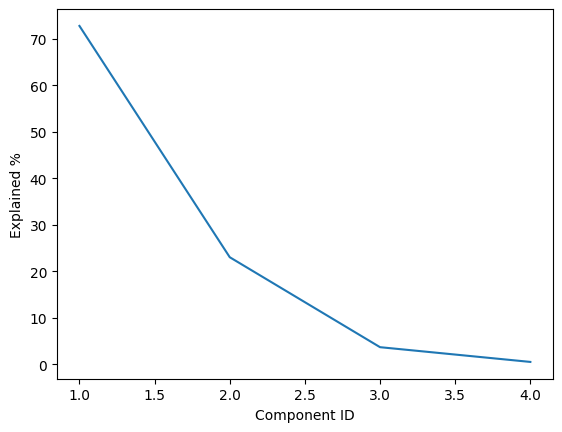

In [22]:
import numpy as np
pca_all = PCA(n_components=4)
pca_all.fit(x)
print(pca_all.explained_variance_ratio_)
# 각 컴포넌트의 설명률 (PC1, PC2, ... 순서대로 계속 작아지는 게 정상)
# PC3 이후로는 설명률이 10% 미만이다.
plt.plot(np.arange(1, 5), pca_all.explained_variance_ratio_ * 100)
plt.xlabel("Component ID")
plt.ylabel("Explained %")

컴포넌트 개수에 따른 누적 설명률 => 2개만 있어도 90%이상 설명 가능

Text(0, 0.5, 'Explained %')

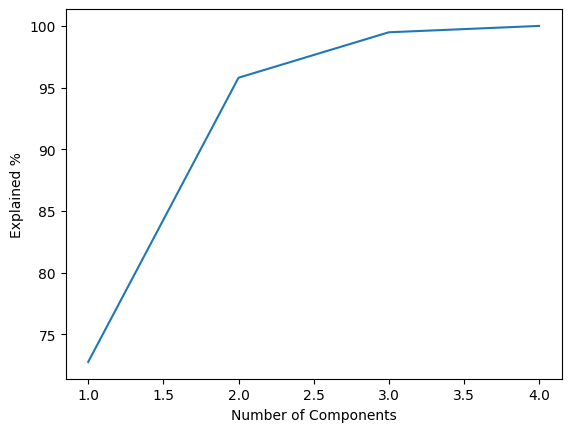

In [23]:
plt.plot(np.arange(1, 5), np.cumsum(pca_all.explained_variance_ratio_) * 100)
plt.xlabel("Number of Components")
plt.ylabel("Explained %")